In [15]:
import pandas as pd 
import numpy as np
import pickle 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import joblib
import pickle

In [2]:
# Load Data Train csv
df_train = pickle.load(open('Train_Test/train_bams.p','rb'))
n_descriptor = 25 #kombinasi terbaik

In [3]:
# Load Pickle corr_desc 100
label = pickle.load(open("corr/new_corr_desc100.p", "rb"))
train = df_train.loc[:,label]
train["pIC50"]= df_train.iloc[:,-1]

In [4]:
train.head()

,VCH-5,C2SP3,MATS6s,VCH-6,MATS6e,maxssCH2,nHCsats,RDF30i,MATS6m,AATSC6e,...,MDEC-24,TDB7i,GATS8p,LipoaffinityIndex,ATSC0i,maxaaN,AATSC4v,MATS4v,SdssC,pIC50
125,0.079057,5,-0.073039,0.204167,-0.020915,0.308132,7.0,31.342620,0.025259,-0.002998,...,3.790840,1097.391522,0.892185,7.746921,158.580485,4.895724,0.807813,0.016043,-0.391950,5.958
74,0.047140,5,-0.157112,0.067974,-0.171494,0.091382,5.0,15.322729,-0.133094,-0.033627,...,0.000000,1158.865159,0.558102,4.586146,113.895976,0.000000,0.659194,0.015259,-1.835451,5.854
1,0.000000,4,-0.075440,0.052908,-0.081837,0.636263,8.0,30.259482,-0.148965,-0.011131,...,0.000000,1075.748653,0.851960,9.605068,141.259918,0.000000,-4.650728,-0.096101,-3.046487,6.292
110,0.038490,5,-0.060055,0.144355,-0.076918,0.247882,7.0,32.981299,-0.010507,-0.010605,...,4.828881,1094.892321,0.905527,8.867171,156.690297,4.043887,-0.956532,-0.019696,-0.434628,7.921
99,0.047140,5,-0.100758,0.095752,-0.122192,0.183100,5.0,24.816437,-0.065333,-0.019596,...,0.000000,1085.646631,0.747700,6.869454,143.458804,0.000000,-2.380910,-0.052585,-2.109316,5.854


In [5]:
# Data train dan validasi(test)
train, test = train_test_split(train, test_size = 0.2, random_state = 10)
train.shape, test.shape 

((85, 101), (22, 101))

In [6]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]
y_train = train.iloc[:, [-1]]
y_test = test.iloc[:,[-1]]

In [7]:
train

,VCH-5,C2SP3,MATS6s,VCH-6,MATS6e,maxssCH2,nHCsats,RDF30i,MATS6m,AATSC6e,...,MDEC-24,TDB7i,GATS8p,LipoaffinityIndex,ATSC0i,maxaaN,AATSC4v,MATS4v,SdssC,pIC50
65,0.000000,3,-0.103790,0.020833,-0.125246,0.623789,7.0,25.261823,-0.150373,-0.019827,...,0.000000,1036.610333,0.799604,6.027048,116.447698,0.000000,-5.232173,-0.114706,-0.137971,5.347
86,0.047140,5,-0.085220,0.095752,-0.113502,0.167600,5.0,25.320616,-0.057883,-0.017918,...,0.000000,1095.797497,0.684479,7.500024,150.264489,0.000000,-3.358163,-0.072846,-4.065747,5.509
111,0.000000,5,-0.072084,0.156900,-0.076780,0.347018,7.0,29.694956,0.003438,-0.006604,...,4.996349,1083.476436,0.948543,9.139674,116.850145,4.060921,-2.115094,-0.041058,-0.263677,6.309
27,0.091287,6,-0.040410,0.152543,-0.054141,0.835290,8.0,30.719225,-0.003119,-0.008569,...,0.000000,1087.202043,0.848348,9.074517,156.294905,3.923472,-1.660102,-0.035395,-0.183466,8.201
132,0.020412,5,-0.060641,0.145522,-0.017984,0.059749,7.0,27.236026,-0.003581,-0.002787,...,3.416283,1098.301233,0.896360,7.315860,157.791418,4.112585,0.444162,0.009440,-0.556761,7.301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.091287,6,-0.063933,0.131027,-0.026642,0.478119,8.0,35.828030,-0.055558,-0.006067,...,1.179102,1130.549321,0.666947,8.661775,188.022831,0.000000,-1.074636,-0.023886,-0.533726,8.824
75,0.047140,5,-0.131194,0.100049,-0.164723,0.200796,5.0,21.714492,-0.105138,-0.025750,...,0.000000,1048.209460,0.738934,7.710488,137.141674,0.000000,0.352203,0.007570,-1.161271,6.149
92,0.047140,5,-0.126872,0.095752,-0.179701,0.246315,7.0,25.599395,-0.078722,-0.028270,...,0.000000,1063.520659,0.885844,7.561106,151.295310,0.000000,-2.771913,-0.060505,-1.584331,6.161
120,0.079057,5,-0.087945,0.215408,-0.020591,0.395243,7.0,30.999266,0.020759,-0.001851,...,3.984388,1070.247577,0.939603,7.062473,116.467069,4.911941,1.061710,0.020260,-0.232800,7.221


In [8]:
X_train.shape

(85, 100)

In [9]:
#initialization
c1 = 1.49 #acceleration coefficient
c2 = 1.49 #acceleration coefficient
w = 0.73 #inertia weight
vel_limit = 0.6 #limit of velocity
n_part = 20 #number of particle
n_iter = 100 #number of iteration
n_desc = X_train.shape[1] #total number of descriptor
sel_desc = 25 #number of selected descriptor

In [10]:
n_desc

100

In [11]:
model = LinearRegression()

In [12]:
# method PSO
# mse_list = list()

n_list = list()
for i in tqdm(range(20)):
    
    ### Initiate particles
    part = []
    for i in range(n_part):
        list_index = np.random.choice(X_train.shape[1], sel_desc, replace=False)
        list_index = list(list_index)
        list_index.sort()
        list_index
        part.append(list_index)

    ### Initiate Velocity
    vel = []
    for i in range(n_part):
        list_vel = list(np.zeros(sel_desc))
        vel.append(list_vel)

    pbest_part = []
    pbest_mse = []

    for i in range(n_part):
        pbestMse = np.inf
        pbest_mse.append(pbestMse)
        pbest_part.append(0)
    #print(pbest_mse)
    gbest_mse = np.inf

    for l in range(n_iter):
        for j in range(n_part):
            list_index = part[j]
            X_train_slice = X_train.iloc[:,list_index]
            X_test_slice = X_test.iloc[:,list_index]
            
            mmscaler = MinMaxScaler()
            mmscaler.fit(X_train_slice)
            sc_x_train = mmscaler.transform(X_train_slice)
            sc_x_test = mmscaler.transform(X_test_slice)
                    
            model.fit(X_train_slice, y_train)
            pred = model.predict(sc_x_test)
            mse_value = mean_squared_error(y_test, pred)
            if mse_value < pbest_mse[j]:
                pbest_mse[j] = mse_value
                pbest_part[j] = list_index[:]
        gbest_mse = min(pbest_mse)
        gbest_part = pbest_part[np.argmin(pbest_mse)]
        for j in range(n_part):
            for i in range(sel_desc):
                vel[j][i] = (w * vel[j][i]) + (c1 * np.random.rand() * (pbest_part[j][i]-part[j][i]))+(c2 * np.random.rand() * (gbest_part[i] - part[j][i]))
                if vel[j][i] > vel_limit:
                    vel[j][i] = vel_limit
                if vel[j][i] < -vel_limit:
                    vel[j][i] = -vel_limit
                part[j][i] = int(round(part[j][i]+vel[j][i]))
            
    n_list.append([gbest_part,gbest_mse])

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:49<00:00,  8.47s/it]


In [13]:
n_list
df = pd.DataFrame(n_list, columns=['Particles','MSE'])

In [14]:
df_sort = df.copy()
df_sort.sort_values('MSE', inplace=True)
df_sort

,Particles,MSE
6,"[1, 5, 7, 14, 19, 27, 31, 36, 36, 37, 41, 39, ...",0.273423
4,"[3, 5, 6, 15, 19, 21, 27, 28, 33, 35, 39, 42, ...",0.344763
18,"[1, 5, 13, 18, 23, 28, 36, 40, 41, 45, 48, 49,...",0.385951
13,"[6, 7, 10, 12, 14, 18, 21, 26, 29, 36, 36, 45,...",0.393930
19,"[4, 7, 16, 18, 21, 27, 33, 34, 39, 44, 50, 50,...",0.469219
7,"[5, 5, 16, 19, 28, 29, 38, 38, 41, 50, 50, 59,...",0.495408
16,"[2, 5, 15, 16, 21, 26, 28, 34, 39, 41, 50, 56,...",0.521417
17,"[1, 5, 8, 12, 17, 17, 25, 27, 29, 40, 44, 46, ...",0.536410
3,"[2, 6, 12, 14, 18, 21, 26, 29, 35, 36, 43, 48,...",0.556562
15,"[10, 14, 16, 17, 21, 27, 29, 32, 37, 42, 44, 4...",0.598273


In [15]:
var = df.sort_values(by=['MSE'], inplace=True)
var = df['MSE']
var

6     0.273423
4     0.344763
18    0.385951
13    0.393930
19    0.469219
7     0.495408
16    0.521417
17    0.536410
3     0.556562
15    0.598273
8     0.658267
1     0.669222
9     0.699521
12    0.707524
11    0.726678
5     1.234832
14    1.410018
0     1.654518
2     1.719407
10    2.181987
Name: MSE, dtype: float64

In [16]:
joblib.dump(var,'./mse/new_mse25.pkl')

['./mse/new_mse25.pkl']

In [17]:
joblib.load('./mse/new_mse25.pkl')

6     0.273423
4     0.344763
18    0.385951
13    0.393930
19    0.469219
7     0.495408
16    0.521417
17    0.536410
3     0.556562
15    0.598273
8     0.658267
1     0.669222
9     0.699521
12    0.707524
11    0.726678
5     1.234832
14    1.410018
0     1.654518
2     1.719407
10    2.181987
Name: MSE, dtype: float64

In [18]:
desc_name = X_train.columns.tolist()
desc_name = np.array(desc_name)
print(desc_name)

['VCH-5' 'C2SP3' 'MATS6s' 'VCH-6' 'MATS6e' 'maxssCH2' 'nHCsats' 'RDF30i'
 'MATS6m' 'AATSC6e' 'nssssC' 'SpMax2_Bhs' 'RDF30u' 'MATS2i' 'ATSC6e'
 'SpMax1_Bhs' 'AATSC6m' 'RDF30e' 'HybRatio' 'AATSC2i' 'ETA_EtaP_L'
 'ATSC6m' 'AVP-7' 'VCH-7' 'AVP-4' 'SpMax3_Bhs' 'ATSC2i' 'AATSC6s' 'ATSC6s'
 'VCH-4' 'AVP-6' 'SCH-5' 'AVP-5' 'SCH-4' 'SRW5' 'MDEC-34' 'RDF30s'
 'ATSC2s' 'MATS2s' 'SpMax7_Bhs' 'minHBint4' 'n3Ring' 'SRW3' 'nHBint4'
 'VCH-3' 'SCH-3' 'TDB4i' 'MATS4p' 'nssCH2' 'SRW7' 'SHCsats' 'ATSC2e'
 'AATSC2s' 'GATS3v' 'AATSC2e' 'AVP-3' 'SHBint4' 'AATSC4p' 'SC-4'
 'ETA_EtaP' 'MATS2e' 'AVP-2' 'GATS1c' 'maxtN' 'mintN' 'StN' 'C1SP1'
 'nBondsT' 'ntN' 'ntsC' 'mintsC' 'maxtsC' 'StsC' 'naaN' 'SCH-6' 'SssCH2'
 'ATSC4p' 'Dv' 'SsssCH' 'MAXDN2' 'nF' 'nsF' 'JGI1' 'CrippenLogP' 'SsF'
 'VC-5' 'SRW9' 'VC-4' 'SaaN' 'SC-6' 'nX' 'MDEC-24' 'TDB7i' 'GATS8p'
 'LipoaffinityIndex' 'ATSC0i' 'maxaaN' 'AATSC4v' 'MATS4v' 'SdssC']


In [19]:
best_desc = desc_name[df.loc[0,'Particles']]
best_desc = list(best_desc)
print(best_desc)

['C2SP3', 'maxssCH2', 'AATSC6e', 'RDF30u', 'MATS2i', 'RDF30e', 'ATSC6m', 'SpMax3_Bhs', 'SRW5', 'MDEC-34', 'minHBint4', 'TDB4i', 'nssCH2', 'SHCsats', 'SHBint4', 'SC-4', 'StN', 'ntsC', 'maxtsC', 'ATSC4p', 'ATSC4p', 'SsF', 'SC-6', 'MDEC-24', 'LipoaffinityIndex']


In [20]:
joblib.dump(best_desc,'./desc/new_desc25.pkl')

['./desc/new_desc25.pkl']

In [21]:
joblib.load('./desc/new_desc25.pkl')

['C2SP3',
 'maxssCH2',
 'AATSC6e',
 'RDF30u',
 'MATS2i',
 'RDF30e',
 'ATSC6m',
 'SpMax3_Bhs',
 'SRW5',
 'MDEC-34',
 'minHBint4',
 'TDB4i',
 'nssCH2',
 'SHCsats',
 'SHBint4',
 'SC-4',
 'StN',
 'ntsC',
 'maxtsC',
 'ATSC4p',
 'ATSC4p',
 'SsF',
 'SC-6',
 'MDEC-24',
 'LipoaffinityIndex']

In [22]:
gbest_mse

0.46921928890209047

In [23]:
y_pred = model.predict(X_test_slice)
mse = mean_squared_error(y_test, y_pred)
mse

0.39479541881853386

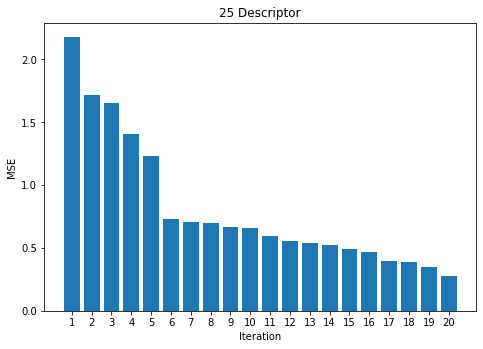

In [2]:
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,1,1])
numb = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19','20']
mse = joblib.load('./mse/new_mse25.pkl')
mse = mse.sort_values(ascending=False)
ax.bar(numb,mse)
plt.title('25 Descriptor')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.savefig('Model Hasil/25 Deskriptor.png', format='png', dpi=1000, bbox_inches="tight")
plt.show()

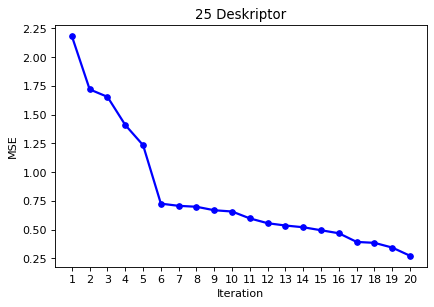

In [3]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19','20']
y = joblib.load('./mse/new_mse25.pkl')
y = mse.sort_values(ascending=False)
plt.title('25 Deskriptor')
ax.set_xlabel('Iteration')
ax.set_ylabel('MSE')
ax.plot(x, y, marker='.',markersize=10, lw=2, color='b')
plt.savefig('Model Hasil/line plot 25 Deskriptor.png', format='png', dpi=1000, bbox_inches="tight")
plt.show()

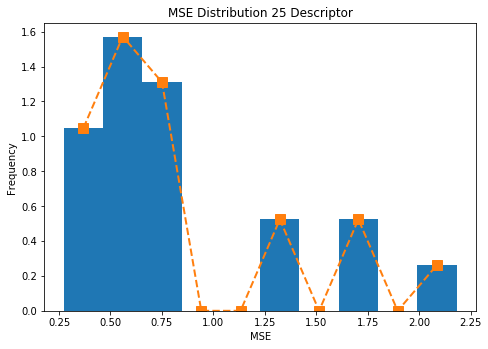

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,1,1]) 
mse = joblib.load('./mse/new_mse25.pkl')
mse = mse.sort_values(ascending=False)

y, binEdges = np.histogram(mse, bins=10, density= True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

plt.hist(mse, density= True, bins=10)
plt.plot(bincenters,y,'--', lw=2, marker='s', markersize='10')
plt.title('MSE Distribution 25 Descriptor')
plt.ylabel('Frequency')
plt.xlabel('MSE')
plt.savefig('Model Hasil/MSE Distribution 25 Deskriptor.png', format='png', dpi=1000, bbox_inches="tight")
plt.show()

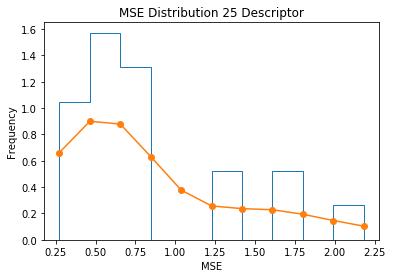

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import noise
from scipy import stats
from scipy.stats.kde import gaussian_kde

fig = plt.figure()
mse = joblib.load('./mse/new_mse25.pkl')
mse = mse.sort_values(ascending=False)

noise = mse
density = stats.gaussian_kde(mse)
n, x, _ = plt.hist(noise, histtype=u'step', density=True)
plt.plot(x, density(x), marker="o")
plt.title('MSE Distribution 25 Descriptor')
plt.ylabel('Frequency')
plt.xlabel('MSE')
plt.savefig('Model Hasil/MSE Distribution 25 Deskriptor.png', format='png', dpi=1000, bbox_inches="tight")
plt.show()

In [26]:
x

array([0.27342326, 0.46427968, 0.6551361 , 0.84599252, 1.03684894,
       1.22770536, 1.41856178, 1.60941821, 1.80027463, 1.99113105,
       2.18198747])